In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import math

In [2]:
stats = "Resources/climate_finished.csv"

stats_df  = pd.read_csv(stats)

In [3]:
stats_df["consumption_per_capita_(L)"].describe()

count    186.000000
mean       6.165054
std        4.080171
min        0.000000
25%        2.425000
50%        6.250000
75%        9.400000
max       15.200000
Name: consumption_per_capita_(L), dtype: float64

In [4]:
pd.cut(stats_df["consumption_per_capita_(L)"], bins=5)

0      (-0.0152, 3.04]
1         (6.08, 9.12]
2      (-0.0152, 3.04]
3        (9.12, 12.16]
4         (6.08, 9.12]
            ...       
181    (-0.0152, 3.04]
182       (3.04, 6.08]
183    (-0.0152, 3.04]
184    (-0.0152, 3.04]
185       (3.04, 6.08]
Name: consumption_per_capita_(L), Length: 186, dtype: category
Categories (5, interval[float64]): [(-0.0152, 3.04] < (3.04, 6.08] < (6.08, 9.12] < (9.12, 12.16] < (12.16, 15.2]]

Alison This Cell Here !


In [5]:

cut_labels = ["Very Light", "Light", "Medium", "Heavy", "Very Heavy"]
cut_bins = [0, 1, 4, 7, 10, 20]
stats_df["Drinking_Bins"] = pd.cut(stats_df["consumption_per_capita_(L)"], bins=cut_bins, labels=cut_labels)
stats_df.head()

,Unnamed: 0,Unnamed: 0.1,continent,country_code,country,consumption_per_capita_(L),climate,main_export,main_industry,region,happy_score,life_expectancy,gdp_per_capita,code,mental_health_and_addiction (%),Climate_Fixed,Drinking_Bins
0,0,0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,Fruit and nuts,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,AFG,17.553463,Arid,Very Light
1,1,1,Europe,ALB,Albania,7.5,"mild Temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,ALB,10.987610,Temperate,Heavy
2,2,4942,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Oil,petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,DZA,14.700388,Arid,Very Light
3,3,4943,Europe,AND,Andorra,11.3,"Temperate; snowy, cold winters and warm, dry s...",Tobacco products,tourism,NaN,NaN,NaN,NaN,AND,14.726869,Temperate,Very Heavy
4,4,4944,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,Oil,petroleum,NaN,NaN,NaN,NaN,AGO,12.498281,Tropical,Medium


In [6]:
stats_df["Drinking_Bins"].value_counts()

Heavy         45
Light         40
Very Heavy    37
Medium        36
Very Light    23
Name: Drinking_Bins, dtype: int64

Seperate into separate DataFrames

In [7]:
drinking_bins = ["Very Light", "Light", "Medium", "Heavy", "Very Heavy"]
consumption_values = []
country_number = []

for drinking_bins in drinking_bins:
    bins_df = stats_df.loc[stats_df["Drinking_Bins"] == drinking_bins]
    
    values=bins_df["consumption_per_capita_(L)"].sum()
    consumption_values.append(values)
    
    number = len(stats_df)
    country_number.append(number)
    
    avg_consumption_bins = np.array([consumption_values])/np.array([country_number])

print(avg_consumption_bins)

[[0.07311828 0.54408602 1.09301075 2.0844086  2.37043011]]


In [8]:
#Create a dataframe for each bin 
very_light_df = stats_df.loc[stats_df['Drinking_Bins']=='Very Light']

very_light_df.round(2)
#averages
very_light_consumption = very_light_df["consumption_per_capita_(L)"].mean()
very_light_happiness = very_light_df["happy_score"].mean()
very_light_life = very_light_df["life_expectancy"].mean()
very_light_gdp = very_light_df["gdp_per_capita"].mean()
very_light_addiction = very_light_df["mental_health_and_addiction (%)"].mean()




print(very_light_consumption)
print(very_light_happiness)
print(very_light_life)
print(very_light_gdp)
print(very_light_addiction)


0.591304347826087
4.784356251312501
61.586327790625006
8.9320933815
13.588588626086958


In [9]:
light_df = stats_df.loc[stats_df['Drinking_Bins']=='Light']

light_consumption = light_df["consumption_per_capita_(L)"].mean()
light_happiness = light_df["happy_score"].mean()
light_life = light_df["life_expectancy"].mean()
light_gdp = light_df["gdp_per_capita"].mean()
light_addiction = light_df["mental_health_and_addiction (%)"].mean()

print(light_consumption,light_happiness,light_life, light_gdp,light_addiction)

2.53 5.2051606944642845 61.61110319428571 8.570028322035714 12.353983505128205


In [10]:
medium_df = stats_df.loc[stats_df['Drinking_Bins']=='Medium']

medium_consumption = medium_df["consumption_per_capita_(L)"].mean()
medium_happiness = medium_df["happy_score"].mean()
medium_life = medium_df["life_expectancy"].mean()
medium_gdp = medium_df["gdp_per_capita"].mean()
medium_addiction = medium_df["mental_health_and_addiction (%)"].mean()

print(medium_consumption,medium_happiness,medium_life,medium_gdp,medium_addiction)

5.647222222222223 5.079172010480001 62.664390411599996 8.762150802640003 12.320441922571424


In [11]:
heavy_df = stats_df.loc[stats_df['Drinking_Bins']=='Heavy']

heavy_consumption = heavy_df["consumption_per_capita_(L)"].mean()
heavy_happiness = heavy_df["happy_score"].mean()
heavy_life = heavy_df["life_expectancy"].mean()
heavy_gdp = heavy_df["gdp_per_capita"].mean()
heavy_addiction = heavy_df["mental_health_and_addiction (%)"].mean()

print(heavy_consumption, heavy_happiness, heavy_life, heavy_gdp, heavy_addiction)

8.615555555555556 5.629619986657144 65.8943797522857 9.568910789999997 13.171500725681824


In [12]:
very_heavy_df = stats_df.loc[stats_df['Drinking_Bins']=='Very Heavy']

very_heavy_consumption = very_heavy_df["consumption_per_capita_(L)"].mean()
very_heavy_happiness = very_heavy_df["happy_score"].mean()
very_heavy_life = very_heavy_df["life_expectancy"].mean()
very_heavy_gdp = very_heavy_df["gdp_per_capita"].mean()
very_heavy_addiction = very_heavy_df["mental_health_and_addiction (%)"].mean()

print(very_heavy_consumption,very_heavy_happiness,very_heavy_life,very_heavy_gdp,very_heavy_addiction)

11.916216216216217 6.302539377515151 69.08792576666667 10.252519087363638 13.515031362162162


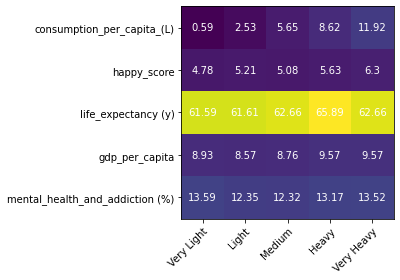

In [15]:


Labels = ["consumption_per_capita_(L)", "happy_score", "life_expectancy (y)", "gdp_per_capita", "mental_health_and_addiction (%)"]
Bins = ["Very Light", "Light", "Medium", "Heavy", "Very Heavy"]

#Creates array and rounds to 2 decimal places
data = np.around([[very_light_consumption,light_consumption,medium_consumption,heavy_consumption,very_heavy_consumption],
                 [very_light_happiness,light_happiness,medium_happiness,heavy_happiness,very_heavy_happiness],
                 [very_light_life,light_life,medium_life,heavy_life,medium_life],
                 [very_light_gdp,light_gdp,medium_gdp,heavy_gdp,heavy_gdp],
                 [very_light_addiction,light_addiction,medium_addiction,heavy_addiction,very_heavy_addiction]], decimals=2)





#test array
#data = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
#                [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0]])

fig, ax = plt.subplots()
im = ax.imshow(data)

#define bounds of array equal to number of labels
ax.set_xticks(np.arange(len(Bins)))
ax.set_yticks(np.arange(len(Labels)))
#Label each Axis
ax.set_xticklabels(Bins)
ax.set_yticklabels(Labels)
#Rotate Labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


for i in range(len(Labels)):
    for j in range(len(Bins)):
        text = ax.text(j, i, data[i, j],
                       ha="center", va="center", color="w")
        

ax.set_title("")
fig.tight_layout()
plt.show()

In [17]:
stats_df.to_csv("finished_df.csv")

# Analysis


-Initial thoughts

-Process

-Findings


# Matrix excluding life expectancy

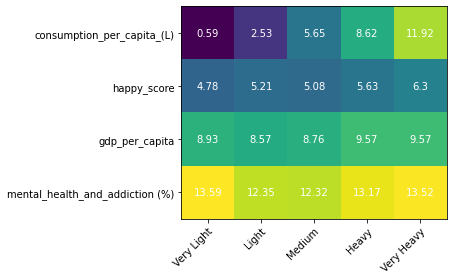

In [19]:


Labels = ["consumption_per_capita_(L)", "happy_score", "gdp_per_capita", "mental_health_and_addiction (%)"]
Bins = ["Very Light", "Light", "Medium", "Heavy", "Very Heavy"]

#Creates array and rounds to 2 decimal places
data = np.around([[very_light_consumption,light_consumption,medium_consumption,heavy_consumption,very_heavy_consumption],
                 [very_light_happiness,light_happiness,medium_happiness,heavy_happiness,very_heavy_happiness],
                 [very_light_gdp,light_gdp,medium_gdp,heavy_gdp,heavy_gdp],
                 [very_light_addiction,light_addiction,medium_addiction,heavy_addiction,very_heavy_addiction]], decimals=2)





#test array
#data = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
#                [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0]])

fig, ax = plt.subplots()
im = ax.imshow(data)

#define bounds of array equal to number of labels
ax.set_xticks(np.arange(len(Bins)))
ax.set_yticks(np.arange(len(Labels)))
#Label each Axis
ax.set_xticklabels(Bins)
ax.set_yticklabels(Labels)
#Rotate Labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


for i in range(len(Labels)):
    for j in range(len(Bins)):
        text = ax.text(j, i, data[i, j],
                       ha="center", va="center", color="w")
        

ax.set_title("")
fig.tight_layout()
plt.show()